## Importing the Neccessary Libraries

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten , InputLayer

## Loading the Dataset

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train.shape

(60000, 28, 28)

    ### Shape -  (No of Images , Height, Width)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

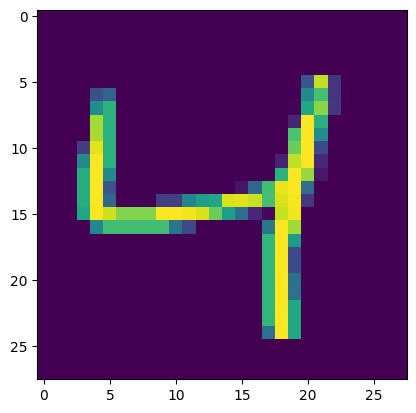

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

## Scaling the values between 0 and 1 , so that the model performs better

In [7]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)

In [12]:
X_train.shape[1:]

TensorShape([28, 28])

 # Experiment 1


## Model Building

In [13]:
model = Sequential()

# InputLayer - Flattened Layer
input_layer = model.add(InputLayer(shape=X_train.shape[1:]))

model.add(Flatten(input_layer))

# Hidden Layer
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))

## Model Summary

In [ ]:
model.summary()

## Model Compiling
    # We are using sparse_categorical_crossentropy because
    # it is a multiclass classification problem

In [14]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Model Training

In [15]:
history =model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8573 - loss: 0.4870 - val_accuracy: 0.9567 - val_loss: 0.1494
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9613 - loss: 0.1297 - val_accuracy: 0.9647 - val_loss: 0.1209
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9746 - loss: 0.0823 - val_accuracy: 0.9693 - val_loss: 0.1024
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9810 - loss: 0.0625 - val_accuracy: 0.9734 - val_loss: 0.0919
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0450 - val_accuracy: 0.9718 - val_loss: 0.1012
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9900 - loss: 0.0329 - val_accuracy: 0.9730 - val_loss: 0.0987
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9916 - loss: 0.0272 - val_accuracy: 0.9740 - val_loss: 0.0978
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0226 - 

## Model Evaluation

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9670 - loss: 0.1386


## Model Prediction

In [17]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
y_pred

array([[2.76308788e-13, 1.45658041e-10, 3.78134303e-07, ...,
        9.99990344e-01, 6.10705375e-11, 2.32021555e-10],
       [7.66764717e-15, 4.66783746e-07, 9.99999523e-01, ...,
        9.90441285e-10, 2.08654409e-08, 2.20598667e-16],
       [1.00035194e-07, 9.99849916e-01, 6.32445663e-05, ...,
        5.54298385e-05, 2.90007138e-05, 2.17806946e-08],
       ...,
       [4.37132562e-14, 2.71198889e-13, 3.10442623e-14, ...,
        8.35332425e-09, 7.19825088e-10, 1.84482742e-05],
       [7.63337572e-18, 2.39956969e-16, 2.98825523e-20, ...,
        2.78316597e-17, 6.10446027e-10, 8.57418944e-18],
       [8.55748610e-08, 1.00716039e-12, 3.64436731e-10, ...,
        6.93578995e-15, 1.01960128e-10, 1.90523552e-11]], dtype=float32)

In [19]:
y_pred = y_pred.argmax(axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

## Model Performance

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9727

## Visualization of Loss and Accuracy

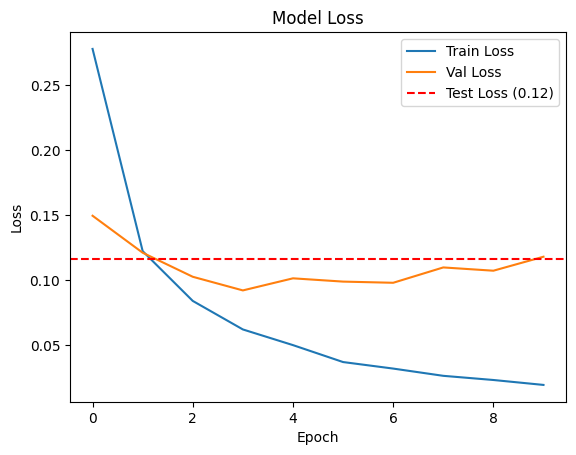

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss ({test_loss:.2f})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

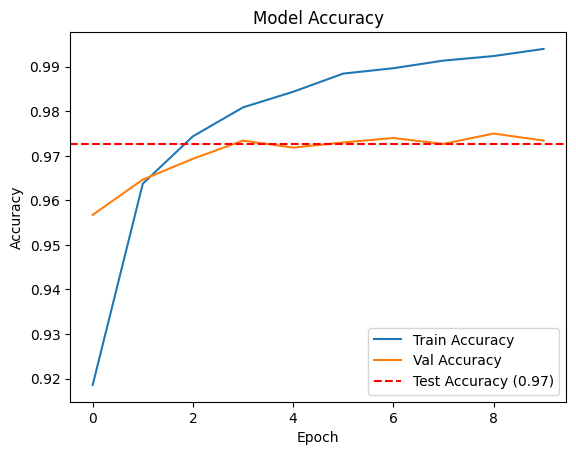

In [22]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy ({test_accuracy:.2f})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

 # Experiment 2 - Increasing the Epochs to 50


## Model Building

In [23]:
model = Sequential()

# InputLayer - Flattened Layer
input_layer = model.add(InputLayer(shape=X_train.shape[1:]))

model.add(Flatten(input_layer))

# Hidden Layer
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))

## Model Summary

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,816 (1.20 MB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 209,878 (819.84 KB)

## Model Compiling
    # We are using sparse_categorical_crossentropy because
    # it is a multiclass classification problem

In [24]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Model Training

In [25]:
history =model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8544 - loss: 0.5020 - val_accuracy: 0.9570 - val_loss: 0.1427
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9635 - loss: 0.1242 - val_accuracy: 0.9649 - val_loss: 0.1207
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9728 - loss: 0.0874 - val_accuracy: 0.9666 - val_loss: 0.1095
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9818 - loss: 0.0577 - val_accuracy: 0.9757 - val_loss: 0.0821
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9848 - loss: 0.0471 - val_accuracy: 0.9737 - val_loss: 0.0885
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9885 - loss: 0.0370 - val_accuracy: 0.9724 - val_loss: 0.1003
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9923 - loss: 0.0257 - val_accuracy: 0.9748 - val_loss: 0.0932
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9925 - loss: 0.0239 - 

## Model Evaluation

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9735 - loss: 0.2183


## Model Prediction

In [27]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
y_pred

array([[2.3721700e-20, 4.1612819e-15, 8.5304112e-17, ..., 1.0000000e+00,
        1.6438350e-23, 6.9160743e-17],
       [2.3716440e-36, 9.2523957e-18, 1.0000000e+00, ..., 2.2307842e-37,
        1.3858100e-18, 8.4807704e-39],
       [3.6626296e-19, 1.0000000e+00, 2.8266523e-11, ..., 3.7520113e-08,
        2.8509886e-09, 1.1653129e-20],
       ...,
       [0.0000000e+00, 3.1036310e-29, 4.7631536e-41, ..., 1.2053060e-22,
        9.8851129e-32, 3.6682406e-17],
       [3.8928548e-29, 2.3611235e-39, 9.0657985e-40, ..., 2.4062966e-32,
        1.6322912e-11, 2.0219639e-26],
       [2.8423060e-32, 1.7804463e-34, 4.7313181e-36, ..., 1.8861477e-42,
        1.6516543e-23, 5.7139542e-39]], dtype=float32)

In [29]:
y_pred = y_pred.argmax(axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

## Model Performance

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9769

## Visualization of Loss and Accuracy

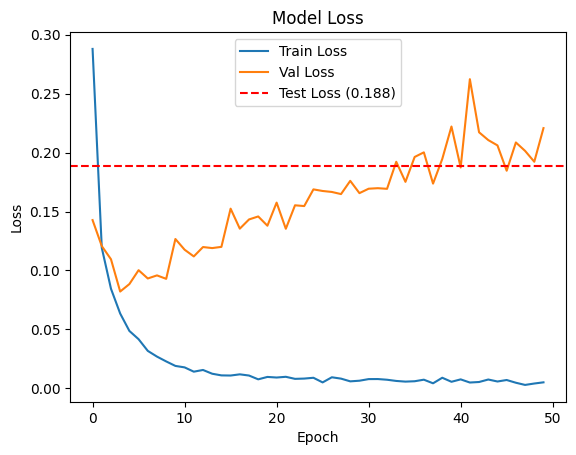

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss ({test_loss:.3f})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

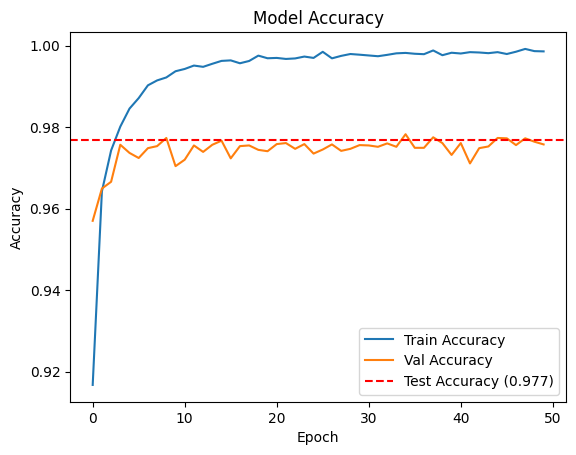

In [33]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy ({test_accuracy:.3f})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

 # Experiment 3 - Increasing the no of perceptrons in the second Hidden Layer


## Model Building

In [35]:
model = Sequential()

# InputLayer - Flattened Layer
input_layer = model.add(InputLayer(shape=X_train.shape[1:]))

model.add(Flatten(input_layer))

# Hidden Layer
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))

## Model Summary

In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

## Model Compiling
    # We are using sparse_categorical_crossentropy because
    # it is a multiclass classification problem

In [37]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Model Training

In [38]:
history =model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8690 - loss: 0.4467 - val_accuracy: 0.9597 - val_loss: 0.1413
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9686 - loss: 0.1071 - val_accuracy: 0.9682 - val_loss: 0.1109
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9767 - loss: 0.0737 - val_accuracy: 0.9649 - val_loss: 0.1144
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9843 - loss: 0.0489 - val_accuracy: 0.9730 - val_loss: 0.0900
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9877 - loss: 0.0388 - val_accuracy: 0.9718 - val_loss: 0.0973
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9903 - loss: 0.0296 - val_accuracy: 0.9762 - val_loss: 0.0909
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9912 - loss: 0.0257 - val_accuracy: 0.9757 - val_loss: 0.0971
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9919 - loss: 0.0221 - 

## Model Evaluation

In [39]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9757 - loss: 0.2266


## Model Prediction

In [40]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [41]:
y_pred

array([[7.43960431e-36, 6.05635733e-24, 3.79733007e-28, ...,
        1.00000000e+00, 2.40007554e-29, 3.22805761e-19],
       [5.70334109e-27, 2.67475273e-21, 1.00000000e+00, ...,
        3.56904743e-34, 8.22518192e-23, 4.20389539e-45],
       [1.14613687e-25, 1.00000000e+00, 8.05215142e-19, ...,
        2.10932920e-12, 1.29354694e-17, 1.56555742e-23],
       ...,
       [0.00000000e+00, 1.86122452e-38, 8.90945564e-42, ...,
        8.38813550e-25, 2.06816796e-27, 1.88730649e-23],
       [0.00000000e+00, 0.00000000e+00, 2.57646940e-40, ...,
        0.00000000e+00, 4.13818586e-30, 0.00000000e+00],
       [1.86783310e-37, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.14891339e-28, 1.63863779e-39]], dtype=float32)

In [42]:
y_pred = y_pred.argmax(axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

## Model Performance

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9795

## Visualization of Loss and Accuracy

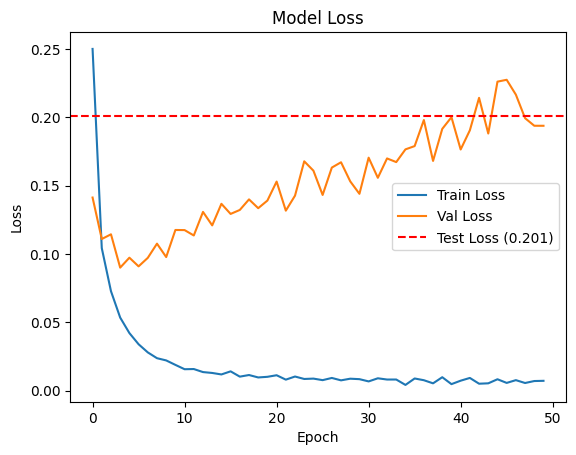

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss ({test_loss:.3f})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

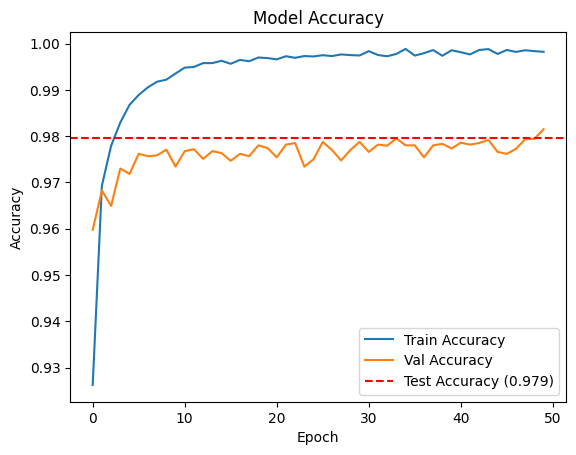

In [45]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy ({test_accuracy:.3f})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()